In [ ]:
##  What i trying to do 
### Try to create a auto trade system of stock market base on the dayily trading report from WWW.ARKINVEST.COM
### The whole concept is create an system downloaning arkinvest trading reporting and analyze the daily buy-sell activity. 
### connecect the analyze result and apply to my stock trading account,place order by aanalysis result. there are two trading model 1. trade base on the result of 
### last day analyze result.  2. apply machine learning to the analyze, create prediction model base on the buy-sell trend and execute the buy-sell order base on the prediction result.


In [ ]:
## Here are the process I ananize the shares buy-sell trend  following by date

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import seaborn as sns
import math
sns.set_theme(color_codes=True)

%matplotlib inline

In [5]:
## loop through all the csv documents on Jun/4/2021

import pandas as pd
import glob
path = r'/Users/balance/Desktop/ARK_6_4_21' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df1 = pd.concat(li, axis=0, ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
## loop through all the csv documents on may/5/2021

path2 = r'/Users/balance/Desktop/ARK_5_5_21' # use your path
all_files2 = glob.glob(path2 + "/*.csv")
li2 = []
for filename2 in all_files2:
    df2 = pd.read_csv(filename2, index_col=None, header=0)
    li2.append(df2)
df2 = pd.concat(li2, axis=0, ignore_index=True)

In [7]:
## loop through all the csv documents on may/5/2021

path3 = r'/Users/balance/Desktop/ARK_6_12_21' # use your path
all_files3 = glob.glob(path3 + "/*.csv")
li3 = []
for filename3 in all_files3:
    df3 = pd.read_csv(filename3, index_col=None, header=0)
    li3.append(df3)
df3 = pd.concat(li3, axis=0, ignore_index=True)

In [8]:
df1.head(1)

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,6/4/2021,PRNT,3D SYSTEMS CORP,DDD,88554D205,1245906.0,37676197.44,6.92


In [9]:
df2.head(1)

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,5/6/2021,PRNT,EXONE CO/THE,XONE,302104104,1488995.0,31566694.0,5.59


In [10]:
df3.head(1)

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,6/11/2021,PRNT,3D SYSTEMS CORP,DDD,88554D205,1237126.0,36247791.8,6.76


In [11]:
merge1=pd.merge(df1,df2,on=['fund','ticker'])

In [12]:
merge2=pd.merge(merge1,df3,on=['fund','ticker'])

In [13]:
## figure out null row after dataset merged / 

for col in merge2.columns:
    pct_missing = np.mean(merge2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date_x - 65%
fund - 97%
company_x - 97%
ticker - 97%
cusip_x - 97%
shares_x - 97%
market value($)_x - 97%
weight(%)_x - 97%
date_y - 65%
company_y - 97%
cusip_y - 97%
shares_y - 97%
market value($)_y - 97%
weight(%)_y - 97%
date - 65%
company - 97%
cusip - 97%
shares - 97%
market value($) - 97%
weight(%) - 97%


In [14]:
merge3=merge2.drop_duplicates()

In [15]:
for col in merge3.columns:
    pct_missing = np.mean(merge3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date_x - 1%
fund - 2%
company_x - 2%
ticker - 9%
cusip_x - 2%
shares_x - 2%
market value($)_x - 2%
weight(%)_x - 2%
date_y - 1%
company_y - 2%
cusip_y - 2%
shares_y - 2%
market value($)_y - 2%
weight(%)_y - 2%
date - 1%
company - 2%
cusip - 2%
shares - 2%
market value($) - 2%
weight(%) - 2%


In [16]:
merge3.head(1)

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,cusip_y,shares_y,market value($)_y,weight(%)_y,date,company,cusip,shares,market value($),weight(%)
0,6/4/2021,PRNT,3D SYSTEMS CORP,DDD,88554D205,1245906.0,37676197.44,6.92,5/6/2021,3D SYSTEMS CORP,88554D205,1320738.0,25133644.14,4.45,6/11/2021,3D SYSTEMS CORP,88554D205,1237126.0,36247791.8,6.76


In [17]:
## adding row show the trend between 6/11 and 6/4

merge3['move_6/11_6/4']=((merge3.shares-merge3.shares_x)/((merge3.shares+merge3.shares_x)/2))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
merge3.head(1)

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,shares_y,market value($)_y,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4
0,6/4/2021,PRNT,3D SYSTEMS CORP,DDD,88554D205,1245906.0,37676197.44,6.92,5/6/2021,3D SYSTEMS CORP,...,1320738.0,25133644.14,4.45,6/11/2021,3D SYSTEMS CORP,88554D205,1237126.0,36247791.8,6.76,-0.007072


In [19]:
merge3.query('ticker=="PLTR"')

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,shares_y,market value($)_y,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4
13959,6/4/2021,ARKK,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,22142340.0,5.232235e+08,2.59,5/6/2021,PALANTIR TECHNOLOGIES INC-A,...,16177341.0,3.421508e+08,1.63,6/11/2021,PALANTIR TECHNOLOGIES INC-A,69608A108,22225151.0,5.365151e+08,2.48,3.732958e-03
14013,6/4/2021,ARKW,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,5311764.0,1.255170e+08,2.35,5/6/2021,PALANTIR TECHNOLOGIES INC-A,...,4856199.0,1.027086e+08,1.69,6/11/2021,PALANTIR TECHNOLOGIES INC-A,69608A108,5311766.0,1.282260e+08,2.32,3.765227e-07


In [20]:
## adding row showing buy sell trend presentage for 3 different date. (presentage)  (day3-day2) + (day2-day1) / day1+day2+day3/3

merge3['move_3days']=(((merge3.shares-merge3.shares_x)+(merge3.shares_x-merge3.shares_y))/((merge3.shares+merge3.shares_x+merge3.shares_y)/3))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
merge3.head(1)

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,market value($)_y,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4,move_3days
0,6/4/2021,PRNT,3D SYSTEMS CORP,DDD,88554D205,1245906.0,37676197.44,6.92,5/6/2021,3D SYSTEMS CORP,...,25133644.14,4.45,6/11/2021,3D SYSTEMS CORP,88554D205,1237126.0,36247791.8,6.76,-0.007072,-0.065944


In [24]:
merge4=merge3.sort_values(['move_6/11_6/4'], ascending=[False]).head(20)

In [25]:
merge4

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,market value($)_y,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4,move_3days
60,6/4/2021,PRNT,GREAT BRITISH POUND,NaN,GBP,0.24,3.400000e-01,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,2.293500e+06,0.41,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,544908.85,5.449088e+05,0.10,1.999998,-1.848139
14194,6/4/2021,ARKF,SOUTH AFRICAN RAND,NaN,ZAR,136.75,1.002000e+01,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,7.338413e+06,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,6480504.41,6.480504e+06,0.18,1.999916,-0.186245
62,6/4/2021,PRNT,GREAT BRITISH POUND,NaN,GBP,0.24,3.400000e-01,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,2.293500e+06,0.41,6/11/2021,EURO,EUR,1031.01,1.254790e+03,0.00,1.999069,-2.997304
57,6/4/2021,PRNT,EURO,NaN,EUR,1031.01,1.250620e+03,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,2.293500e+06,0.41,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,544908.85,5.449088e+05,0.10,1.992446,-1.847468
14099,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,DREYFUS GOVT CASH MAN INS,...,1.690910e+07,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,0.632132
14101,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,CM LIFE SCIENCES II INC,...,6.238017e+06,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,2.813766
14095,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,DREYFUS GOVT CASH MAN INS,...,1.690910e+07,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,0.500590
14097,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,...,6.238017e+06,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,1.980677
14040,6/4/2021,ARKW,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,6080231.92,6.080232e+06,0.11,5/6/2021,DREYFUS GOVT CASH MAN INS,...,5.341004e+06,0.09,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,9540016.01,9.540016e+06,0.17,0.442987,0.600968
14091,6/4/2021,ARKG,SEER INC,SEER,81578P106,962429.00,3.196227e+07,0.40,5/6/2021,SEER INC,...,3.382169e+07,0.39,6/11/2021,SEER INC,81578P106,1408585.00,4.756792e+07,0.53,0.376342,0.527217


In [26]:
merge5=merge4.loc[(merge4['move_6/11_6/4']>0) & (merge4['move_3days']>0)]

In [27]:
merge5

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,market value($)_y,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4,move_3days
14099,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,DREYFUS GOVT CASH MAN INS,...,1.690910e+07,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,0.632132
14101,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,CM LIFE SCIENCES II INC,...,6.238017e+06,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,2.813766
14095,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,DREYFUS GOVT CASH MAN INS,...,1.690910e+07,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,0.500590
14097,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,...,6.238017e+06,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,1.980677
14040,6/4/2021,ARKW,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,6080231.92,6.080232e+06,0.11,5/6/2021,DREYFUS GOVT CASH MAN INS,...,5.341004e+06,0.09,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,9540016.01,9.540016e+06,0.17,0.442987,0.600968
14091,6/4/2021,ARKG,SEER INC,SEER,81578P106,962429.00,3.196227e+07,0.40,5/6/2021,SEER INC,...,3.382169e+07,0.39,6/11/2021,SEER INC,81578P106,1408585.00,4.756792e+07,0.53,0.376342,0.527217
14125,6/4/2021,ARKQ,UIPATH INC - CLASS A,PATH,90364P105,639105.00,4.698700e+07,1.62,5/6/2021,UIPATH INC - CLASS A,...,1.868403e+07,0.61,6/11/2021,UIPATH INC - CLASS A,90364P105,887850.00,6.572754e+07,2.25,0.325805,1.045819
14033,6/4/2021,ARKW,UIPATH INC - CLASS A,PATH,90364P105,725069.00,5.330707e+07,1.00,5/6/2021,UIPATH INC - CLASS A,...,2.955860e+07,0.49,6/11/2021,UIPATH INC - CLASS A,90364P105,994446.00,7.361884e+07,1.33,0.313317,0.810678
14226,6/4/2021,ARKX,UIPATH INC - CLASS A,PATH,90364P105,84858.00,6.238760e+06,1.00,5/6/2021,UIPATH INC - CLASS A,...,2.921899e+06,0.45,6/11/2021,UIPATH INC - CLASS A,90364P105,113800.00,8.424614e+06,1.36,0.291375,0.907565
13971,6/4/2021,ARKK,UIPATH INC - CLASS A,PATH,90364P105,3594703.00,2.642826e+08,1.31,5/6/2021,UIPATH INC - CLASS A,...,1.298462e+08,0.62,6/11/2021,UIPATH INC - CLASS A,90364P105,4633901.00,3.430477e+08,1.59,0.252582,0.835440


In [28]:
### appending data for verifing the analyze above 
append1=df1.append([df2,df3])

<AxesSubplot:xlabel='ticker', ylabel='shares'>

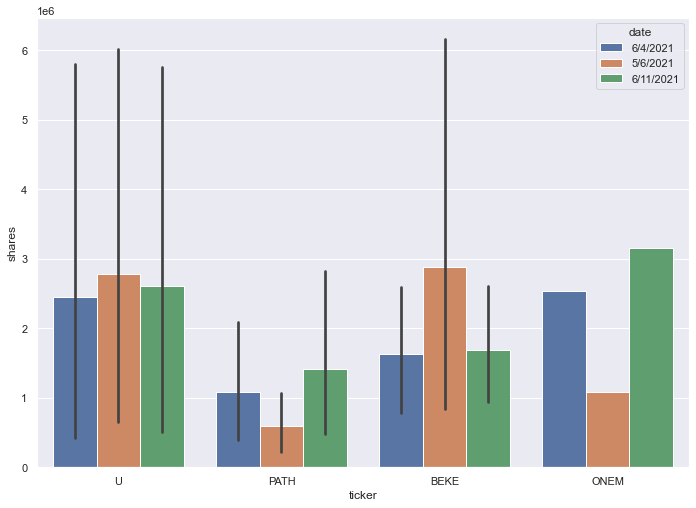

In [29]:
## show top of 6/11_6/4

plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=append1.loc[append1['ticker'].isin(['PATH','ONEM','U','BEKE'])])

In [30]:
merge6=merge5.sort_values(['move_3days'], ascending=[False]).head(20)

In [31]:
merge6

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,market value($)_y,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4,move_3days
14101,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,CM LIFE SCIENCES II INC,...,6.238017e+06,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,2.813766
14097,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,...,6.238017e+06,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,1.980677
14125,6/4/2021,ARKQ,UIPATH INC - CLASS A,PATH,90364P105,639105.00,4.698700e+07,1.62,5/6/2021,UIPATH INC - CLASS A,...,1.868403e+07,0.61,6/11/2021,UIPATH INC - CLASS A,90364P105,887850.00,6.572754e+07,2.25,0.325805,1.045819
14074,6/4/2021,ARKG,1LIFE HEALTHCARE INC,ONEM,68269G107,2539247.00,9.220006e+07,1.15,5/6/2021,1LIFE HEALTHCARE INC,...,4.494480e+07,0.51,6/11/2021,1LIFE HEALTHCARE INC,68269G107,3148932.00,1.069692e+08,1.20,0.214369,0.911372
14226,6/4/2021,ARKX,UIPATH INC - CLASS A,PATH,90364P105,84858.00,6.238760e+06,1.00,5/6/2021,UIPATH INC - CLASS A,...,2.921899e+06,0.45,6/11/2021,UIPATH INC - CLASS A,90364P105,113800.00,8.424614e+06,1.36,0.291375,0.907565
13971,6/4/2021,ARKK,UIPATH INC - CLASS A,PATH,90364P105,3594703.00,2.642826e+08,1.31,5/6/2021,UIPATH INC - CLASS A,...,1.298462e+08,0.62,6/11/2021,UIPATH INC - CLASS A,90364P105,4633901.00,3.430477e+08,1.59,0.252582,0.835440
14033,6/4/2021,ARKW,UIPATH INC - CLASS A,PATH,90364P105,725069.00,5.330707e+07,1.00,5/6/2021,UIPATH INC - CLASS A,...,2.955860e+07,0.49,6/11/2021,UIPATH INC - CLASS A,90364P105,994446.00,7.361884e+07,1.33,0.313317,0.810678
14187,6/4/2021,ARKF,UIPATH INC - CLASS A,PATH,90364P105,425718.00,3.129879e+07,0.87,5/6/2021,UIPATH INC - CLASS A,...,1.851344e+07,0.47,6/11/2021,UIPATH INC - CLASS A,90364P105,530070.00,3.924108e+07,1.07,0.218358,0.662699
14099,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,DREYFUS GOVT CASH MAN INS,...,1.690910e+07,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,0.632132
14040,6/4/2021,ARKW,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,6080231.92,6.080232e+06,0.11,5/6/2021,DREYFUS GOVT CASH MAN INS,...,5.341004e+06,0.09,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,9540016.01,9.540016e+06,0.17,0.442987,0.600968


In [33]:
## here is the another way calculating the buy sell trend precentage for 3 days
### (day3-day2)/(day1+day2+day3) +  (day2-day1)/(day1+day2+day3)

merge3['move_3days_1']=(merge3.shares-merge3.shares_x)/((merge3.shares+merge3.shares_x+merge3.shares_y)/3)+((merge3.shares_x-merge3.shares_y)/((merge3.shares+merge3.shares_x+merge3.shares_y)/3))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
merge3.head(1)

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4,move_3days,move_3days_1
0,6/4/2021,PRNT,3D SYSTEMS CORP,DDD,88554D205,1245906.0,37676197.44,6.92,5/6/2021,3D SYSTEMS CORP,...,4.45,6/11/2021,3D SYSTEMS CORP,88554D205,1237126.0,36247791.8,6.76,-0.007072,-0.065944,-0.065944


In [35]:
## sort result base on 

merge7=merge3.sort_values(['move_3days_1'], ascending=[False]).head(20)

In [38]:
merge7.head(20)

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4,move_3days,move_3days_1
14101,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,CM LIFE SCIENCES II INC,...,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,2.813766,2.813766
14097,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,...,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,1.980677,1.980677
13887,6/4/2021,IZRL,ONE SOFTWARE TECHNOLOGIES LT,ONE,6987709,437860.00,5.678129e+07,15.63,5/6/2021,ONE SOFTWARE TECHNOLOGIES LT,...,1.79,6/11/2021,ONE SOFTWARE TECHNOLOGIES LT,6987709,429180.00,5.452656e+06,1.74,-0.020022,1.258255,1.258255
14125,6/4/2021,ARKQ,UIPATH INC - CLASS A,PATH,90364P105,639105.00,4.698700e+07,1.62,5/6/2021,UIPATH INC - CLASS A,...,0.61,6/11/2021,UIPATH INC - CLASS A,90364P105,887850.00,6.572754e+07,2.25,0.325805,1.045819,1.045819
14023,6/4/2021,ARKW,OKTA INC,OKTA,679295105,352579.00,7.429545e+07,1.39,5/6/2021,OKTA INC,...,0.42,6/11/2021,OKTA INC,679295105,352579.00,7.831485e+07,1.42,0.000000,0.914722,0.914722
14074,6/4/2021,ARKG,1LIFE HEALTHCARE INC,ONEM,68269G107,2539247.00,9.220006e+07,1.15,5/6/2021,1LIFE HEALTHCARE INC,...,0.51,6/11/2021,1LIFE HEALTHCARE INC,68269G107,3148932.00,1.069692e+08,1.20,0.214369,0.911372,0.911372
14226,6/4/2021,ARKX,UIPATH INC - CLASS A,PATH,90364P105,84858.00,6.238760e+06,1.00,5/6/2021,UIPATH INC - CLASS A,...,0.45,6/11/2021,UIPATH INC - CLASS A,90364P105,113800.00,8.424614e+06,1.36,0.291375,0.907565,0.907565
13971,6/4/2021,ARKK,UIPATH INC - CLASS A,PATH,90364P105,3594703.00,2.642826e+08,1.31,5/6/2021,UIPATH INC - CLASS A,...,0.62,6/11/2021,UIPATH INC - CLASS A,90364P105,4633901.00,3.430477e+08,1.59,0.252582,0.835440,0.835440
14033,6/4/2021,ARKW,UIPATH INC - CLASS A,PATH,90364P105,725069.00,5.330707e+07,1.00,5/6/2021,UIPATH INC - CLASS A,...,0.49,6/11/2021,UIPATH INC - CLASS A,90364P105,994446.00,7.361884e+07,1.33,0.313317,0.810678,0.810678
14160,6/4/2021,ARKF,COINBASE GLOBAL INC -CLASS A,COIN,19260Q107,462885.00,1.081577e+08,3.01,5/6/2021,COINBASE GLOBAL INC -CLASS A,...,1.19,6/11/2021,COINBASE GLOBAL INC -CLASS A,19260Q107,462885.00,1.026910e+08,2.80,0.000000,0.802322,0.802322


<AxesSubplot:xlabel='ticker', ylabel='shares'>

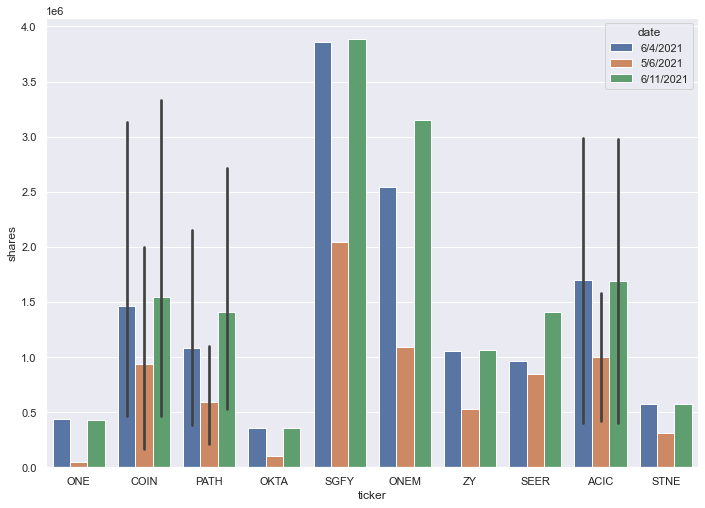

In [39]:
## show top of 6/11_6/4

plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=append1.loc[append1['ticker'].isin(['ONE','PATH','OKTA','ONEM','COIN','ZY','SGFY','ACIC','STNE','SEER'])])

In [40]:
merge3.sort_values(['move_6/11_6/4'], ascending=[False]).head(20)

,date_x,fund,company_x,ticker,cusip_x,shares_x,market value($)_x,weight(%)_x,date_y,company_y,...,weight(%)_y,date,company,cusip,shares,market value($),weight(%),move_6/11_6/4,move_3days,move_3days_1
60,6/4/2021,PRNT,GREAT BRITISH POUND,NaN,GBP,0.24,3.400000e-01,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,0.41,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,544908.85,5.449088e+05,0.10,1.999998,-1.848139,-1.848139
14194,6/4/2021,ARKF,SOUTH AFRICAN RAND,NaN,ZAR,136.75,1.002000e+01,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,6480504.41,6.480504e+06,0.18,1.999916,-0.186245,-0.186245
62,6/4/2021,PRNT,GREAT BRITISH POUND,NaN,GBP,0.24,3.400000e-01,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,0.41,6/11/2021,EURO,EUR,1031.01,1.254790e+03,0.00,1.999069,-2.997304,-2.997304
57,6/4/2021,PRNT,EURO,NaN,EUR,1031.01,1.250620e+03,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,...,0.41,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,544908.85,5.449088e+05,0.10,1.992446,-1.847468,-1.847468
14099,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,DREYFUS GOVT CASH MAN INS,...,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,0.632132,0.632132
14101,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,125842203,787766.00,1.039851e+07,0.13,5/6/2021,CM LIFE SCIENCES II INC,...,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,1.883014,2.813766,2.813766
14095,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,DREYFUS GOVT CASH MAN INS,...,0.19,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,0.500590,0.500590
14097,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,...,0.07,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,26147608.31,2.614761e+07,0.29,0.719704,1.980677,1.980677
14040,6/4/2021,ARKW,DREYFUS GOVT CASH MAN INS,NaN,X9USDDGCM,6080231.92,6.080232e+06,0.11,5/6/2021,DREYFUS GOVT CASH MAN INS,...,0.09,6/11/2021,DREYFUS GOVT CASH MAN INS,X9USDDGCM,9540016.01,9.540016e+06,0.17,0.442987,0.600968,0.600968
14091,6/4/2021,ARKG,SEER INC,SEER,81578P106,962429.00,3.196227e+07,0.40,5/6/2021,SEER INC,...,0.39,6/11/2021,SEER INC,81578P106,1408585.00,4.756792e+07,0.53,0.376342,0.527217,0.527217


<AxesSubplot:xlabel='ticker', ylabel='shares'>

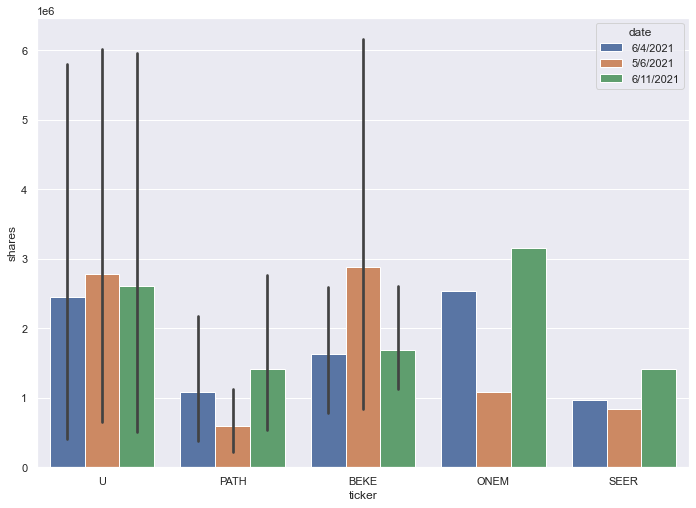

In [41]:
## show top of 6/11_6/4

plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=append1.loc[append1['ticker'].isin(['SEER','PATH','ONEM','U','BEKE'])])

In [48]:
df1.query('ticker=="BEKE"')

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
163,6/4/2021,ARKK,KE HOLDINGS INC-ADR,BEKE,482497104,2597714.0,1.201443e+08,0.60
206,6/4/2021,ARKW,KE HOLDINGS INC-ADR,BEKE,482497104,1512493.0,6.995280e+07,1.31
379,6/4/2021,ARKF,KE HOLDINGS INC-ADR,BEKE,482497104,785789.0,3.634274e+07,1.01


In [49]:
df2.query('ticker=="BEKE"')

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
143,5/6/2021,ARKK,KE HOLDINGS INC-ADR,BEKE,482497104,6160873.0,3.050248e+08,1.45
208,5/6/2021,ARKW,KE HOLDINGS INC-ADR,BEKE,482497104,1666782.0,8.252238e+07,1.36
386,5/6/2021,ARKF,KE HOLDINGS INC-ADR,BEKE,482497104,839932.0,4.158503e+07,1.06


In [50]:
df3.query('ticker=="BEKE"')

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
163,6/11/2021,ARKK,KE HOLDINGS INC-ADR,BEKE,482497104,2607430.0,1.229143e+08,0.57
204,6/11/2021,ARKW,KE HOLDINGS INC-ADR,BEKE,482497104,1512493.0,7.129892e+07,1.29
368,6/11/2021,ARKF,KE HOLDINGS INC-ADR,BEKE,482497104,938338.0,4.423325e+07,1.20
